전처리 - 분석대상 빼고 다 제거 / 제목과 리뷰내용의 겹치는걸 제거 (학습부진)

# 아이스크림

In [29]:
import pandas as pd

data = pd.read_csv('../../bigdata/ice_review.csv')

In [30]:
data

,제목,연수 분야,시간,후기,별점,날짜,가격
0,그림으로 배우는 한국사 이미지 노트 2,교과지도,30,역사를 재미있게 자세히 복습할 수 있었습니다.,5,2024-06-14,65000
1,흔들리지 않는 교실을 위한 단호한 학급운영,학급경영,30,쏭쌤과 이종대왕 샘! 너무 대단하시고 감사합니다. 평소에 영상으로 접하다가 알짜배기...,5,2024-06-13,85000
2,흔들리지 않는 교실을 위한 단호한 학급운영,학급경영,30,유익한 내용이 많았습니다. 고맙습니다.,5,2024-05-23,85000
3,흔들리지 않는 교실을 위한 단호한 학급운영,학급경영,30,저경력교사에게 학급운영을 어떻게 해나갈지 큰 그림을 그려볼 수 있는 연수였습니다.,5,2024-05-04,85000
4,흔들리지 않는 교실을 위한 단호한 학급운영,학급경영,30,유익한 연수였고 교재로도 유튜브로도 많은 도움을 받았습니다.,5,2024-04-18,85000
...,...,...,...,...,...,...,...
2429,성공적인 교직 수행을 위한 필수 교직실무2,자기계발,30,우리가 학교 현장에서 하고 있는 교육행정 분야에 대해 조금 더 자세히 알게 되어 좋...,5,2023-12-27,75000
2430,성공적인 교직 수행을 위한 필수 교직실무,자기계발,30,"학교에서 교육과 행정이 입술과 치아와 같은데, 이번 연수를 통해 교직 실무를 조금 ...",5,2023-12-27,75000
2431,허쌤&나쌤의 승승장구 학급경영,학급경영,30,9년차 교사이지만 들으면서 다시 새기는 내용이 많습니다. 참고할만한 내용을 많이 얻...,5,2023-12-24,75000
2432,나를 알고 꿈을 찾아가는 진로교육,생활지도,30,보통 진로 차시가 학기당 5차시쯤 있는데... 무엇을 해야할지 애매하고 참 어려웠습...,5,2023-12-20,75000


In [1]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from konlpy.tag import Kkma, Hannanum, Komoran, Okt
from sklearn.preprocessing import OneHotEncoder


In [32]:
sample = data.iloc[747]['후기']

In [33]:
sample

'이미 노션을 사용하고 있는 상태에서 좀더 알고 싶어 수강신청했습니다. 그런데.. 이미 노션을 어느 정도 사용할 수 있음에도 불구하고, 강의를 따라가기가 쉽지 않더군요. 강사님과 함께 앱을 활용하여 내용을 만들어 가는 과정을 강의할 때도 혼자 작업하는 것처럼 너무 빠르게 별다른 설명없이 진행이 되었습니다. (내용을 채워넣는 단계에서 빠르게 입력하는 것을 보여주는 경우를 말하는 것이 아닙니다) 계속 강의를 멈추고 어느 것을 눌러야 하는지 찾고 연구해 가며 들은 강의였습니다. 좀더 천천히 어느 것을 선택하고 클릭해야 하는지 알려주셔야 배우는 데 도움이 될 것 같습니다.'

In [34]:
hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
okt = Okt()

def compare_morphs(sample_data):
  print(f'hannanum: {hannanum.morphs(sample_data)}')
  print(f'kkma: {kkma.morphs(sample_data)}')
  print(f'komoran: {komoran.morphs(sample_data)}')
  print(f'okt: {okt.morphs(sample_data)}')

In [35]:
compare_morphs(sample)

hannanum: ['이미', '노션', '을', '사용', '하고', '있', '는', '상태', '에서', '좀더', '알', '고', '싶', '어', '수강신청', '하', '었습니다', '.', '그런데', '..', '이미', '노션', '을', '어느', '정도', '사용', '하', 'ㄹ', '수', '있', '음', '에도', '불구', '하고', ',', '강의', '를', '따르', '아', '가', '기', '가', '쉽', '지', '않', '더군', '요', '.', '강사님', '과', '함께', '앱', '을', '활용', '하', '어', '내용', '을', '만들', '어', '가', '는', '과정', '을', '강의', '하', 'ㄹ', '때', '도', '혼자', '작업', '하', '는', '것', '처럼', '너무', '빠르', '게', '별다르', 'ㄴ', '설명', '없이', '진행', '이', '되', '었습니다', '.', '(', '내용', '을', '채워넣', '는', '단계', '에서', '빠르', '게', '입력', '하', '는', '것', '을', '보이', '어', '주', '는', '경우', '를', '말', '하', '는', '것', '이', '아니', 'ㅂ니다', ')', '계속', '강의', '를', '멈추', '고', '어느', '것', '을', '누르', '어야', '하', '는지', '찾', '고', '연구', '하', '어', '가', '며', '들', 'ㄴ', '강의', '이', '었습니다', '.', '좀더', '천천히', '어느', '것', '을', '선택', '하고', '클릭', '하', '어야', '하', '는지', '알리', '어', '주', '시어야', '배우', '는', '데', '도움', '이', '되', 'ㄹ', '것', '같', '습니다', '.']
kkma: ['이미', '노션', '을', '사용', '하', '고', '있', '는', '상태', '에서', '좀더'

In [36]:
stop_words = [
    '은', '는', '이', '가', '을', '를', '에', '에서', '의', '와', '과', '도', '으로', '로', '한', '하다',
    '어', '그리고', '그래서', '그러나', '하지만', '때문에', '저', '나', '너', '우리', '당신', '아', '어', '예', 
    '아니', '다니', '고', '게', '도', '있', '하', '게', '들', '된', '하다', '더', '게', '것', '들', '등', '합니다', 
    '수', '그리고', '만큼', '좀', '아주', '조금', '합니다', '되', '된', '것', '에', '서', '게', '지만', '했다', '했', 
    '된', '통해', '고', '되었', '는지', '있는', '되면', '번', '갔었', '라는', '지만', '같다', '라고', '너무', '해서', 
    '말', '번', '이후', '것', '좀', '어떻게', '있는', '처럼', '대해', '동안', '위해', '정말', '제일', '아직', '모두'
]

word_tokens = okt.morphs(sample)
remove_tokens = [word for word in word_tokens if word not in stop_words]
print(word_tokens)
print(remove_tokens)

['이미', '노션', '을', '사용', '하고', '있는', '상태', '에서', '좀더', '알', '고', '싶어', '수강신청', '했습니다', '.', '그런데', '..', '이미', '노션', '을', '어느', '정도', '사용', '할', '수', '있음에도', '불구', '하고', ',', '강의', '를', '따라가기가', '쉽지', '않더군요', '.', '강사', '님', '과', '함께', '앱', '을', '활용', '하여', '내용', '을', '만들어', '가는', '과정', '을', '강의', '할', '때', '도', '혼자', '작업', '하는', '것', '처럼', '너무', '빠르게', '별다른', '설명', '없이', '진행', '이', '되었습니다', '.', '(', '내용', '을', '채워', '넣는', '단계', '에서', '빠르게', '입력', '하는', '것', '을', '보여주는', '경우', '를', '말', '하는', '것', '이', '아닙니다', ')', '계속', '강의', '를', '멈추고', '어느', '것', '을', '눌러야', '하는지', '찾고', '연구', '해', '가며', '들은', '강의', '였습니다', '.', '좀더', '천천히', '어느', '것', '을', '선택', '하고', '클릭', '해야', '하는지', '알려주셔야', '배우는', '데', '도움', '이', '될', '것', '같습니다', '.']
['이미', '노션', '사용', '하고', '상태', '좀더', '알', '싶어', '수강신청', '했습니다', '.', '그런데', '..', '이미', '노션', '어느', '정도', '사용', '할', '있음에도', '불구', '하고', ',', '강의', '따라가기가', '쉽지', '않더군요', '.', '강사', '님', '함께', '앱', '활용', '하여', '내용', '만들어', '가는', '과정', '강의', '할', '때', '혼자', '작업',

In [37]:
import re


# 정규표현식을 사용하여 특수 문자 및 공백 제거 함수 정의
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # 특수 문자 제거
    text = re.sub(r'\s+', ' ', text)     # 여러 개의 공백을 하나의 공백으로 변환
    return text.strip()                  # 문자열 양 끝의 공백 제거

# 형태소 분석을 통해 전처리 수행
word_tokens = okt.morphs(sample)
filtered_tokens = [word for word in word_tokens if word not in stop_words]
filtered_text = ' '.join(filtered_tokens)
filtered_text = clean_text(filtered_text)

In [38]:
print(word_tokens)
print(filtered_tokens)
print(filtered_text)

['이미', '노션', '을', '사용', '하고', '있는', '상태', '에서', '좀더', '알', '고', '싶어', '수강신청', '했습니다', '.', '그런데', '..', '이미', '노션', '을', '어느', '정도', '사용', '할', '수', '있음에도', '불구', '하고', ',', '강의', '를', '따라가기가', '쉽지', '않더군요', '.', '강사', '님', '과', '함께', '앱', '을', '활용', '하여', '내용', '을', '만들어', '가는', '과정', '을', '강의', '할', '때', '도', '혼자', '작업', '하는', '것', '처럼', '너무', '빠르게', '별다른', '설명', '없이', '진행', '이', '되었습니다', '.', '(', '내용', '을', '채워', '넣는', '단계', '에서', '빠르게', '입력', '하는', '것', '을', '보여주는', '경우', '를', '말', '하는', '것', '이', '아닙니다', ')', '계속', '강의', '를', '멈추고', '어느', '것', '을', '눌러야', '하는지', '찾고', '연구', '해', '가며', '들은', '강의', '였습니다', '.', '좀더', '천천히', '어느', '것', '을', '선택', '하고', '클릭', '해야', '하는지', '알려주셔야', '배우는', '데', '도움', '이', '될', '것', '같습니다', '.']
['이미', '노션', '사용', '하고', '상태', '좀더', '알', '싶어', '수강신청', '했습니다', '.', '그런데', '..', '이미', '노션', '어느', '정도', '사용', '할', '있음에도', '불구', '하고', ',', '강의', '따라가기가', '쉽지', '않더군요', '.', '강사', '님', '함께', '앱', '활용', '하여', '내용', '만들어', '가는', '과정', '강의', '할', '때', '혼자', '작업',

In [1]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from konlpy.tag import Kkma, Hannanum, Komoran, Okt
from sklearn.preprocessing import OneHotEncoder

In [2]:
okt = Okt()
tokenizer = Tokenizer()
stop_words = [
    '은', '는', '이', '가', '을', '를', '에', '에서', '의', '와', '과', '도', '으로', '로', '한', '하다',
    '어', '그리고', '그래서', '그러나', '하지만', '때문에', '저', '나', '너', '우리', '당신', '아', '어', '예', 
    '아니', '다니', '고', '게', '도', '있', '하', '게', '들', '된', '하다', '더', '게', '것', '들', '등', '합니다', 
    '수', '그리고', '만큼', '좀', '아주', '조금', '합니다', '되', '된', '것', '에', '서', '게', '지만', '했다', '했', 
    '된', '통해', '고', '되었', '는지', '있는', '되면', '번', '갔었', '라는', '지만', '같다', '라고', '너무', '해서', 
    '말', '번', '이후', '것', '좀', '어떻게', '있는', '처럼', '대해', '동안', '위해', '정말', '제일', '아직', '모두'
]

In [3]:
train = pd.read_csv('../../bigdata/ice_review.csv')

전처리

In [4]:
# 'Unnamed: 0' 열 제거
if 'Unnamed: 0' in train.columns:
    train = train.drop(columns=['Unnamed: 0'])

# 결측치 확인 및 처리
train = train.dropna(subset=['후기', '별점'])


In [5]:
# 별점 기준 라벨링: 4-5점은 긍정(1), 1-3점은 부정(0)
train['label'] = train['별점'].apply(lambda x: 1 if x > 4 else 0)

In [6]:
import re

# 정규표현식을 사용하여 특수 문자 및 공백 제거 함수 정의
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # 특수 문자 제거
    text = re.sub(r'\s+', ' ', text)     # 여러 개의 공백을 하나의 공백으로 변환
    return text.strip()     

In [7]:
# 전처리 및 토큰화 함수 정의
def preprocess(sentence):
    # 특수 문자 및 공백 제거
    sentence = clean_text(sentence)
    # 형태소 분석 및 불용어 처리
    tokenized_sentence = okt.morphs(sentence, stem=True)
    removed_sentence = [word for word in tokenized_sentence if word not in stop_words]
    return ' '.join(removed_sentence)

In [8]:
train['후기'] = train['후기'].apply(preprocess)

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(train['후기'])
X_train = X_train.toarray()

In [10]:
y_train = train['label']

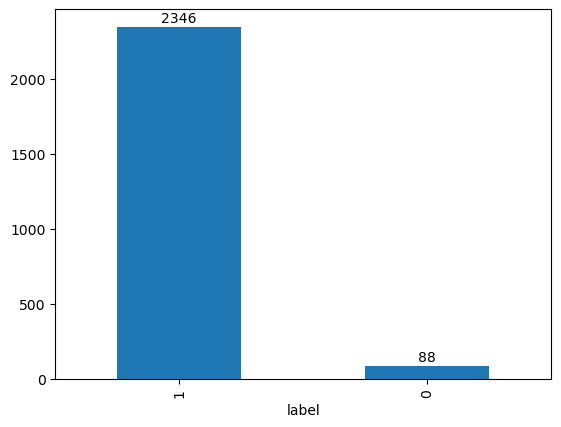

In [13]:
import matplotlib.pyplot as plt

# 레이블 값의 카운트 계산
value_counts = train['label'].value_counts()

# 막대 그래프 그리기
ax = value_counts.plot(kind='bar')

# 막대 위에 숫자 표시하기
for i, v in enumerate(value_counts):
    ax.text(i, v + 10, str(v), ha='center', va='bottom')
plt.show()

In [15]:
y_train = np.array(y_train).reshape(-1,1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
  X_train, y_train, random_state=42, shuffle=True, test_size=0.3
  )

In [17]:
X_train = keras.preprocessing.sequence.pad_sequences(X_train)
X_test = keras.preprocessing.sequence.pad_sequences(X_test)

In [18]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras

# LSTM 모델 정의
model = keras.models.Sequential([
    keras.layers.LSTM(32, dropout=0.3, recurrent_dropout=0.3),
    keras.layers.Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [79]:
# 모델 훈련
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 21s 462ms/step - acc: 0.8720 - loss: 0.5782 - val_acc: 0.9736 - val_loss: 0.1282
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 464ms/step - acc: 0.9597 - loss: 0.1831 - val_acc: 0.9736 - val_loss: 0.1220
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 461ms/step - acc: 0.9682 - loss: 0.1419 - val_acc: 0.9736 - val_loss: 0.1222
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 448ms/step - acc: 0.9694 - loss: 0.1382 - val_acc: 0.9736 - val_loss: 0.1222
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 459ms/step - acc: 0.9651 - loss: 0.1519 - val_acc: 0.9736 - val_loss: 0.1221
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 455ms/step - acc: 0.9696 - loss: 0.1376 - val_acc: 0.9736 - val_loss: 0.1225
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 22s 507ms/step - acc: 0.9660 - loss: 0.1497 - val_acc: 0.9736 - val_loss: 0.1224
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 22s 524ms/step - acc: 0.9642 - loss: 0.1556 - val_acc: 0.9736 - val_loss: 0.1222
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 457ms/

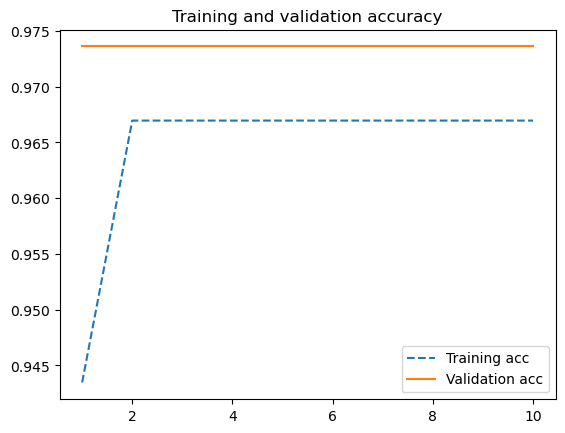

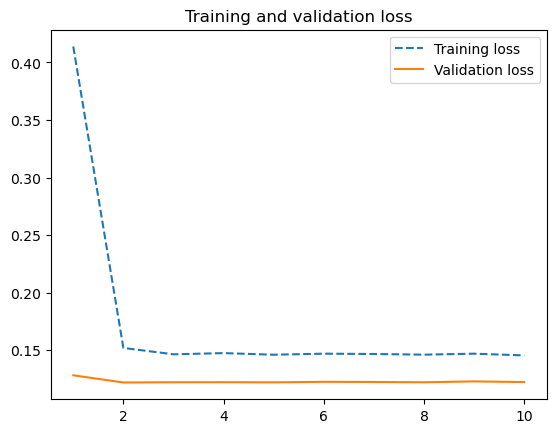

In [80]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '--', label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, '--', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 언더샘플링

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, recall_score
from konlpy.tag import Okt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer

In [93]:
# 데이터 불러오기
train = pd.read_csv('../../bigdata/ice_review.csv')

# 'Unnamed: 0' 열 제거
if 'Unnamed: 0' in train.columns:
    train = train.drop(columns=['Unnamed: 0'])

# 결측치 제거
train = train.dropna(subset=['후기', '별점'])

# 별점 기준 라벨링: 4-5점은 긍정(1), 1-3점은 부정(0)
train['label'] = train['별점'].apply(lambda x: 1 if x > 4 else 0)

In [94]:
# 정규표현식을 사용하여 특수 문자 및 공백 제거 함수 정의
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # 특수 문자 제거
    text = re.sub(r'\s+', ' ', text)     # 여러 개의 공백을 하나의 공백으로 변환
    return text.strip() 

In [95]:
# 전처리 및 토큰화 함수 정의
okt = Okt()
stop_words = [
    '은', '는', '이', '가', '을', '를', '에', '에서', '의', '와', '과', '도', '으로', '로', '한', '하다',
    '어', '그리고', '그래서', '그러나', '하지만', '때문에', '저', '나', '너', '우리', '당신', '아', '어', '예', 
    '아니', '다니', '고', '게', '도', '있', '하', '게', '들', '된', '하다', '더', '게', '것', '들', '등', '합니다', 
    '수', '그리고', '만큼', '좀', '아주', '조금', '합니다', '되', '된', '것', '에', '서', '게', '지만', '했다', '했', 
    '된', '통해', '고', '되었', '는지', '있는', '되면', '번', '갔었', '라는', '지만', '같다', '라고', '너무', '해서', 
    '말', '번', '이후', '것', '좀', '어떻게', '있는', '처럼', '대해', '동안', '위해', '정말', '제일', '아직', '모두'
]

In [96]:
def preprocess(sentence):
    # 특수 문자 및 공백 제거
    sentence = clean_text(sentence)
    # 형태소 분석 및 불용어 처리
    tokenized_sentence = okt.morphs(sentence, stem=True)
    removed_sentence = [word for word in tokenized_sentence if word not in stop_words]
    return ' '.join(removed_sentence)

# 전체 데이터셋에 전처리 적용
train['후기'] = train['후기'].apply(preprocess)

In [97]:
# 언더 샘플링: label이 1인 데이터만 샘플링하여 줄임
Training_data_0 = train[train['label'] == 0]
Training_data_1 = train[train['label'] == 1].sample(500, random_state=41)

# label이 0인 데이터와 label이 1인 300개의 데이터를 합쳐서 랜덤하게 섞음
Undersample_data = pd.concat([Training_data_0, Training_data_1]).sample(frac=1, random_state=41).reset_index(drop=True)


<Axes: xlabel='label'>

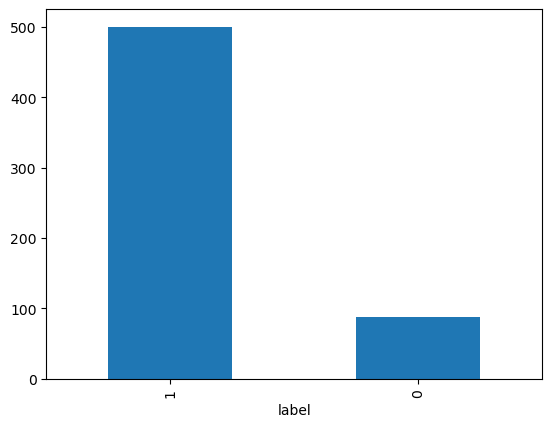

In [98]:
Undersample_data['label'].value_counts().plot(kind = 'bar')

In [99]:
# TF-IDF 벡터화
tfidf = TfidfVectorizer()
X_tfidf = tfidf.fit_transform(Undersample_data['후기'])

# TF-IDF 벡터를 LSTM 모델에 입력할 형태로 변환
X_train_lstm = X_tfidf.toarray().reshape(X_tfidf.shape[0], 1, X_tfidf.shape[1])
y_train = Undersample_data['label']

In [100]:
y_train = Undersample_data['label']

In [101]:
# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_train_lstm, y_train, test_size=0.2, random_state=42, shuffle=True)

In [118]:
from sklearn.metrics import recall_score

# LSTM 모델 정의
model = Sequential([
    LSTM(128, dropout=0.3, recurrent_dropout=0.3, input_shape=(1, X_tfidf.shape[1]), return_sequences=True),
    LSTM(64, dropout=0.3, recurrent_dropout=0.3),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [119]:
# 모델 훈련
history = model.fit(X_train, y_train, epochs=10, batch_size=48, validation_split=0.2)


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 85ms/step - accuracy: 0.7532 - loss: 0.6896 - val_accuracy: 0.8085 - val_loss: 0.6799
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8644 - loss: 0.6716 - val_accuracy: 0.8085 - val_loss: 0.6602
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8601 - loss: 0.6431 - val_accuracy: 0.8085 - val_loss: 0.6296
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8618 - loss: 0.5984 - val_accuracy: 0.8085 - val_loss: 0.5860
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8758 - loss: 0.5261 - val_accuracy: 0.8085 - val_loss: 0.5323
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8661 - loss: 0.4548 - val_accuracy: 0.8085 - val_loss: 0.4870
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8509 - loss: 0.3919 - val_accuracy: 0.8085 - val_loss: 0.4733
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8424 - loss: 0.3641 - val_accuracy: 0.8085 - val_loss: 0.4845
Epoch 9

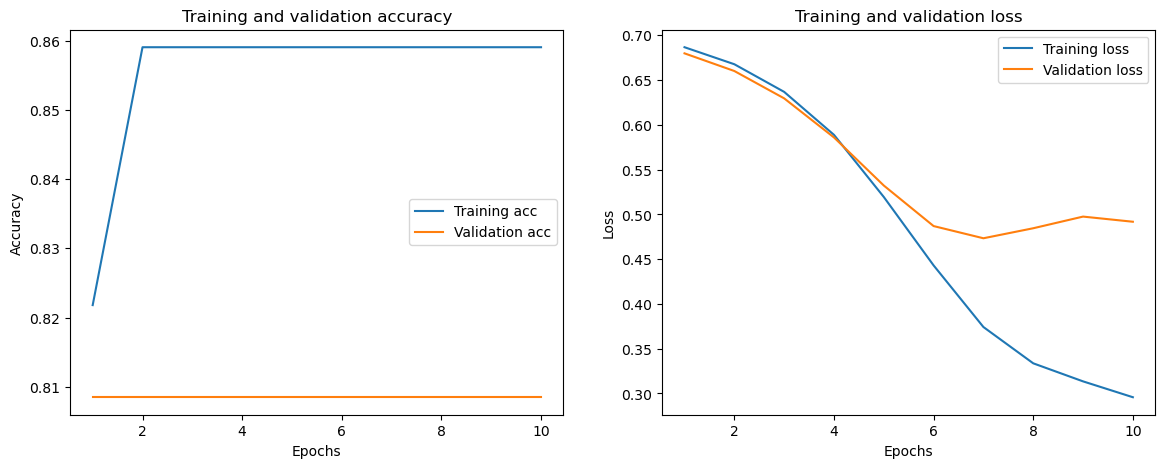

In [120]:
import matplotlib.pyplot as plt

# 학습 정확도 및 손실 기록
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# 학습 및 검증 정확도 시각화
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# 학습 및 검증 손실 시각화
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_17132\1607523919.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['후기'] = negative_reviews['후기'].apply(preprocess)


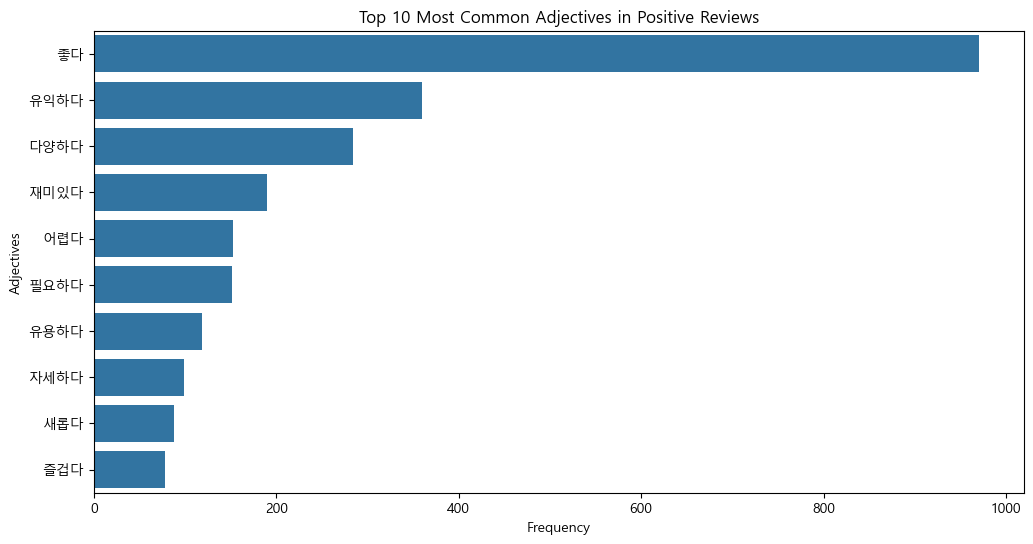

In [103]:
import pandas as pd
from collections import Counter
import re
from konlpy.tag import Okt  # Okt 형태소 분석기 사용
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
train = pd.read_csv('../../bigdata/ice_review.csv')

# 'Unnamed: 0' 열 제거
if 'Unnamed: 0' in train.columns:
    train = train.drop(columns=['Unnamed: 0'])

# 결측치 확인 및 처리
train = train.dropna(subset=['후기', '별점'])

# 별점 기준 라벨링: 4-5점은 긍정(1), 1-3점은 부정(0)
train['label'] = train['별점'].apply(lambda x: 1 if x > 4 else 0)

# 정규표현식을 사용하여 특수 문자 및 공백 제거 함수 정의
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # 특수 문자 제거
    text = re.sub(r'\s+', ' ', text)     # 여러 개의 공백을 하나의 공백으로 변환
    return text.strip()

# 전처리 및 토큰화 함수 정의 (형용사만 추출)
okt = Okt()
stop_words = [
    '은', '는', '이', '가', '을', '를', '에', '에서', '의', '와', '과', '도', '으로', '로', '한', '하다',
    '어', '그리고', '그래서', '그러나', '하지만', '때문에', '저', '나', '너', '우리', '당신', '아', '어', '예', 
    '아니', '다니', '고', '게', '도', '있', '하', '게', '들', '된', '하다', '더', '게', '것', '들', '등', '합니다', 
    '수', '그리고', '만큼', '좀', '아주', '조금', '합니다', '되', '된', '것', '에', '서', '게', '지만', '했다', '했', 
    '된', '통해', '고', '되었', '는지', '있는', '되면', '번', '갔었', '라는', '지만', '같다', '라고', '너무', '해서', 
    '말', '번', '이후', '것', '좀', '어떻게', '있는', '처럼', '대해', '동안', '위해', '정말', '제일', '아직', '모두',
    '있다', '이다', '어떻다', '아니다', '없다', '많다'
]

def preprocess(sentence):
    # 특수 문자 및 공백 제거
    sentence = clean_text(sentence)
    # 형태소 분석 및 형용사 추출
    tokenized_sentence = okt.pos(sentence, stem=True)
    adj_words = [word for word, pos in tokenized_sentence if pos == 'Adjective' and word not in stop_words]
    return ' '.join(adj_words)

# label이 0인 리뷰 데이터 필터링
negative_reviews = train[train['label'] == 1]

# 전처리된 후기 데이터 생성 (형용사만 추출)
negative_reviews['후기'] = negative_reviews['후기'].apply(preprocess)

# 모든 후기의 단어를 합침
all_words = ' '.join(negative_reviews['후기']).split()

# 단어 빈도수 계산
word_freq = Counter(all_words)

# 빈도수가 높은 상위 10개 단어 추출
common_words = word_freq.most_common(10)
words = [word for word, freq in common_words]
frequencies = [freq for word, freq in common_words]

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=frequencies, y=words)
plt.title('Top 10 Most Common Adjectives in Positive Reviews')
plt.xlabel('Frequency')
plt.ylabel('Adjectives')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_17132\2925711381.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['후기'] = negative_reviews['후기'].apply(preprocess)


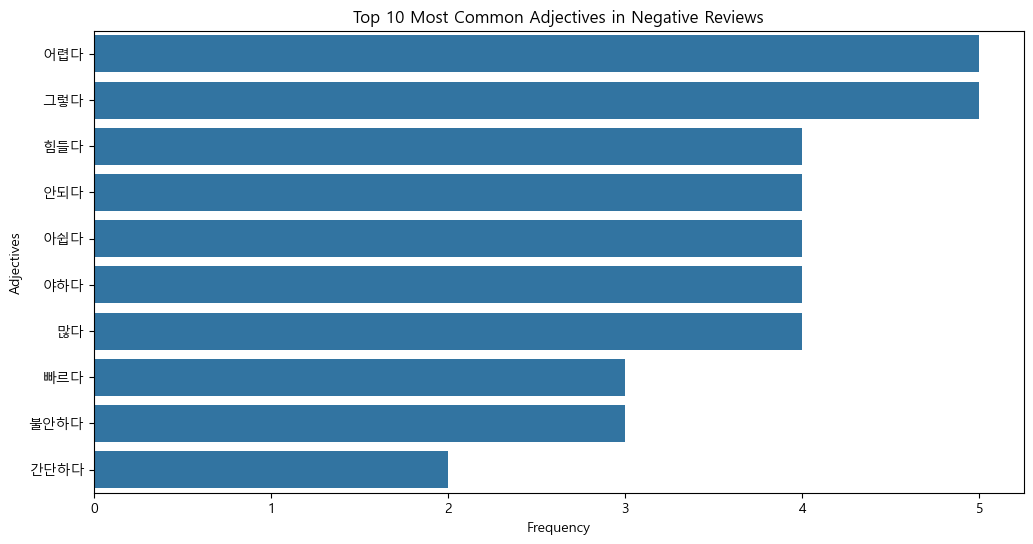

In [100]:
import pandas as pd
from collections import Counter
import re
from konlpy.tag import Okt  # Okt 형태소 분석기 사용
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
train = pd.read_csv('../../bigdata/ice_review.csv')

# 'Unnamed: 0' 열 제거
if 'Unnamed: 0' in train.columns:
    train = train.drop(columns=['Unnamed: 0'])

# 결측치 확인 및 처리
train = train.dropna(subset=['후기', '별점'])

# 별점 기준 라벨링: 4-5점은 긍정(1), 1-3점은 부정(0)
train['label'] = train['별점'].apply(lambda x: 1 if x >= 4 else 0)

# 정규표현식을 사용하여 특수 문자 및 공백 제거 함수 정의
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # 특수 문자 제거
    text = re.sub(r'\s+', ' ', text)     # 여러 개의 공백을 하나의 공백으로 변환
    return text.strip()

# 전처리 및 토큰화 함수 정의 (형용사만 추출)
okt = Okt()
stop_words = [
    '은', '는', '이', '가', '을', '를', '에', '에서', '의', '와', '과', '도', '으로', '로', '한', '하다',
    '어', '그리고', '그래서', '그러나', '하지만', '때문에', '저', '나', '너', '우리', '당신', '아', '어', '예', 
    '아니', '다니', '고', '게', '도', '있', '하', '게', '들', '된', '하다', '더', '게', '것', '들', '등', '합니다', 
    '수', '그리고', '만큼', '좀', '아주', '조금', '합니다', '되', '된', '것', '에', '서', '게', '지만', '했다', '했', 
    '된', '통해', '고', '되었', '는지', '있는', '되면', '번', '갔었', '라는', '지만', '같다', '라고', '너무', '해서', 
    '말', '번', '이후', '것', '좀', '어떻게', '있는', '처럼', '대해', '동안', '위해', '정말', '제일', '아직', '모두',
    '있다', '이다', '어떻다', '아니다', '없다','좋다'
]

def preprocess(sentence):
    # 특수 문자 및 공백 제거
    sentence = clean_text(sentence)
    # 형태소 분석 및 형용사 추출
    tokenized_sentence = okt.pos(sentence, stem=True)
    adj_words = [word for word, pos in tokenized_sentence if pos == 'Adjective' and word not in stop_words]
    return ' '.join(adj_words)

# label이 0인 리뷰 데이터 필터링
negative_reviews = train[train['label'] == 0]

# 전처리된 후기 데이터 생성 (형용사만 추출)
negative_reviews['후기'] = negative_reviews['후기'].apply(preprocess)

# 모든 후기의 단어를 합침
all_words = ' '.join(negative_reviews['후기']).split()

# 단어 빈도수 계산
word_freq = Counter(all_words)

# 빈도수가 높은 상위 10개 단어 추출
common_words = word_freq.most_common(10)
words = [word for word, freq in common_words]
frequencies = [freq for word, freq in common_words]

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=frequencies, y=words)
plt.title('Top 10 Most Common Adjectives in Negative Reviews')
plt.xlabel('Frequency')
plt.ylabel('Adjectives')
plt.show()


머신러닝 (randomforestclassifier)

In [105]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, log_loss, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint
from sklearn.metrics import confusion_matrix

In [106]:
# 데이터 불러오기
train = pd.read_csv('../../bigdata/ice_review.csv')

# 'Unnamed: 0' 열 제거
if 'Unnamed: 0' in train.columns:
    train = train.drop(columns=['Unnamed: 0'])

# 결측치 제거
train = train.dropna(subset=['후기', '별점'])

# 별점 기준 라벨링: 4-5점은 긍정(1), 1-3점은 부정(0)
train['label'] = train['별점'].apply(lambda x: 1 if x > 4 else 0)

In [107]:
# 전처리 및 토큰화 함수 정의
okt = Okt()
stop_words = [
    '은', '는', '이', '가', '을', '를', '에', '에서', '의', '와', '과', '도', '으로', '로', '한', '하다',
    '어', '그리고', '그래서', '그러나', '하지만', '때문에', '저', '나', '너', '우리', '당신', '아', '어', '예', 
    '아니', '다니', '고', '게', '도', '있', '하', '게', '들', '된', '하다', '더', '게', '것', '들', '등', '합니다', 
    '수', '그리고', '만큼', '좀', '아주', '조금', '합니다', '되', '된', '것', '에', '서', '게', '지만', '했다', '했', 
    '된', '통해', '고', '되었', '는지', '있는', '되면', '번', '갔었', '라는', '지만', '같다', '라고', '너무', '해서', 
    '말', '번', '이후', '것', '좀', '어떻게', '있는', '처럼', '대해', '동안', '위해', '정말', '제일', '아직', '모두'
]

In [108]:
# 정규표현식을 사용하여 특수 문자 및 공백 제거 함수 정의
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # 특수 문자 제거
    text = re.sub(r'\s+', ' ', text)     # 여러 개의 공백을 하나의 공백으로 변환
    return text.strip() 


In [109]:
def preprocess(sentence):
    # 특수 문자 및 공백 제거
    sentence = clean_text(sentence)
    # 형태소 분석 및 불용어 처리
    tokenized_sentence = okt.morphs(sentence, stem=True)
    removed_sentence = [word for word in tokenized_sentence if word not in stop_words]
    return ' '.join(removed_sentence)
# 전처리된 후기 데이터 생성
train['후기'] = train['후기'].apply(preprocess)

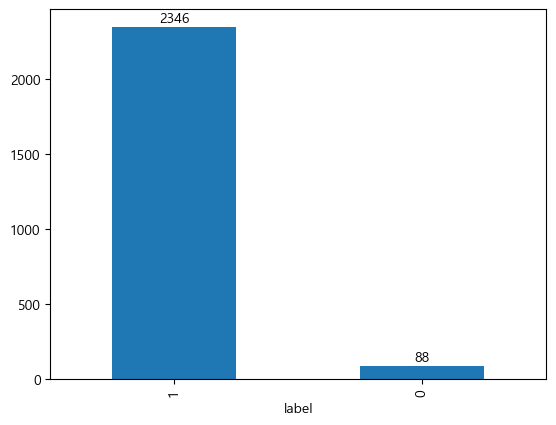

In [110]:
import matplotlib.pyplot as plt

# 레이블 값의 카운트 계산
value_counts = train['label'].value_counts()

# 막대 그래프 그리기
ax = value_counts.plot(kind='bar')

# 막대 위에 숫자 표시하기
for i, v in enumerate(value_counts):
    ax.text(i, v + 10, str(v), ha='center', va='bottom')
plt.show()

In [111]:
# 언더 샘플링 수행
Training_data_0 = train[train['label'] == 0]
Training_data_1 = train[train['label'] == 1].sample(300, random_state=41)
Undersample_data = pd.concat([Training_data_0, Training_data_1]).sample(frac=1, random_state=41).reset_index(drop=True)

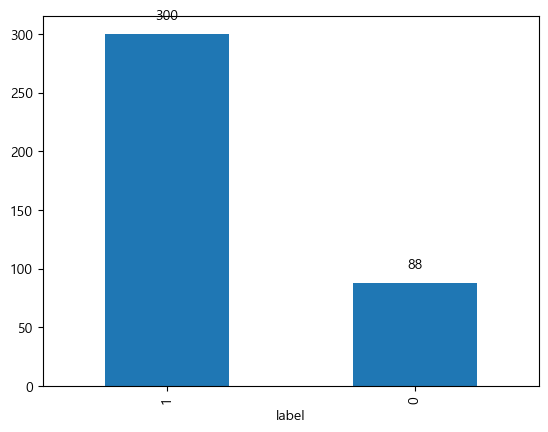

In [112]:
import matplotlib.pyplot as plt

# 레이블 값의 카운트 계산
value_counts = Undersample_data['label'].value_counts()

# 막대 그래프 그리기
ax = value_counts.plot(kind='bar')

# 막대 위에 숫자 표시하기
for i, v in enumerate(value_counts):
    ax.text(i, v + 10, str(v), ha='center', va='bottom')
plt.show()

In [113]:
# TF-IDF 벡터화
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(Undersample_data['후기'])
y = Undersample_data['label']


In [114]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 7216 stored elements and shape (388, 1951)>
  Coords	Values
  (0, 1025)	0.46556033629526045
  (0, 1742)	0.36263223625623636
  (0, 506)	0.397528562697779
  (0, 1435)	0.2696774510412888
  (0, 213)	0.29840883228365034
  (0, 1158)	0.36263223625623636
  (0, 620)	0.2059553850184646
  (0, 1695)	0.397528562697779
  (1, 1435)	0.043737960856749296
  (1, 620)	0.06680624229717419
  (1, 1753)	0.15101492309951806
  (1, 1643)	0.0943852133116284
  (1, 993)	0.10995835867798952
  (1, 286)	0.2824996828775257
  (1, 211)	0.08500547834710796
  (1, 583)	0.10995835867798952
  (1, 350)	0.11479124241797757
  (1, 434)	0.09219428041693885
  (1, 514)	0.12455632407873278
  (1, 1192)	0.08501926589194923
  (1, 1346)	0.10521936086704672
  (1, 472)	0.14124984143876285
  (1, 881)	0.2018687420388558
  (1, 546)	0.12455632407873278
  (1, 979)	0.06910165975795902
  :	:
  (385, 1016)	0.537051766902159
  (385, 1942)	0.5741799810398441
  (386, 1443)	0.20853176651197

In [28]:
# 데이터셋 분리: Train, Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Fitting 3 folds for each of 216 candidates, totalling 648 fits


c:\ProgramData\anaconda3\envs\DL\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 150}
훈련 세트 정확도: 0.8871
훈련 세트 손실: 0.3007
테스트 세트 정확도: 0.8077
테스트 세트 손실: 0.4726
테스트 세트 정밀도: 0.8052
테스트 세트 재현율: 1.0000
테스트 세트 F1 점수: 0.8921
교차 검증 평균 정확도: 0.7677


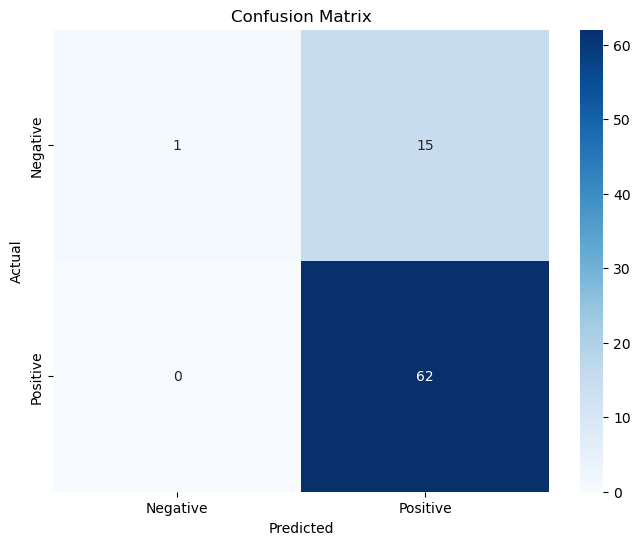

In [29]:
from sklearn.model_selection import GridSearchCV

# 랜덤 포레스트 모델 정의
rf = RandomForestClassifier(random_state=42)

# 그리드 서치 파라미터 설정
param_grid = {
    'n_estimators': [100, 150, 200],  # 적절한 수의 나무
    'max_depth': [10, 20, 30, 40],    # 최대 깊이 제한
    'min_samples_split': [5, 10, 15], # 분할에 필요한 최소 샘플 수
    'min_samples_leaf': [2, 4, 6],    # 리프 노드에 필요한 최소 샘플 수
    'bootstrap': [True, False]        # 부트스트래핑 여부
}

# 그리드 서치 정의
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1, scoring='accuracy')

# 그리드 서치 학습
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print(f"Best parameters found: {grid_search.best_params_}")

# 최적 모델로 예측
best_rf = grid_search.best_estimator_
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# 평가
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_loss = log_loss(y_train, best_rf.predict_proba(X_train))
test_loss = log_loss(y_test, best_rf.predict_proba(X_test))
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
cv_accuracy = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='accuracy').mean()

target_counts = y_test.value_counts()

# 혼동 행렬 계산
conf_matrix = confusion_matrix(y_test, y_test_pred)

# 평가 결과 출력
print(f"훈련 세트 정확도: {train_accuracy:.4f}")
print(f"훈련 세트 손실: {train_loss:.4f}")
print(f"테스트 세트 정확도: {test_accuracy:.4f}")
print(f"테스트 세트 손실: {test_loss:.4f}")
print(f"테스트 세트 정밀도: {precision:.4f}")
print(f"테스트 세트 재현율: {recall:.4f}")
print(f"테스트 세트 F1 점수: {f1:.4f}")
print(f"교차 검증 평균 정확도: {cv_accuracy:.4f}")

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# T셀파

In [30]:
train = pd.read_csv('./tselpa(크롤링).csv', encoding='cp949')

In [31]:
train

,Unnamed: 0,제목,시간,날짜,별점,리뷰제목,리뷰내용,연수 분야,가격,대상
0,0.0,수업을 살리는 체육 레시피,30시간,2024.06.13,5.0,오늘부터는 내가 체육 교담!!!,아이들이 정~~~말 좋아하는 체육을 더 더 즐겁게 해주기 위한 선생님의 노력!!\n...,교과수업,"70,000 원",유치 초등 교육전문직 일반
1,1.0,교사를 위한 교실 밖 여행인문학,15시간,2024.06.10,5.0,올 여름방학 여행은 이 연수를 보고 결정했어요,저는 여행에 관심이 많은 교사입니다. 학기중 바쁜 일정으로 여행은 꿈도 꾸기 어렵더...,인문교양,"40,000 원",전체
2,2.0,왕초보를 위한 캘리그래피,15시간,2024.06.10,5.0,왕초보도 할수 있다!! 캘리그래피,"미술시간에 아이들과 캘리그라피 해봤었는데,이렇게 자세히 알려주는 강의를 듣기는 처음...",자기계발,"40,000 원",전체
3,3.0,그림검사와 다양한 기법으로 만나는 미술치료,30시간,2024.06.07,5.0,유용한 연수예요!,"학생들이 감정이나 내면세계를 미술 활동을 통해 표현하므로 학생 내면에 대해 알고, ...",자기계발,"70,000 원",전체
4,4.0,같이 읽고 함께 나누는 독서수업방법,30시간,2024.06.06,5.0,유익한 후기,워낙 독서토론 분야에서 유명하신 김성현 선생님 강의가 티셀파에서 오픈되어서 바로 들...,학습지도,"70,000 원",초등 중등
...,...,...,...,...,...,...,...,...,...,...
153,153.0,저자가 알려주는 수학 교과서 100% 활용하기 (초등 3~4학년),5시간,2023.12.13,5.0,유용한 교과서 활용 연수,잘 들었습니다~ 연수를 들으니 확실히 교과서에 대한 이해도가 높아졌습니다.,교과서연수,100%할인\n0 원,유치 초등
154,154.0,"학급경영, 수업, 업무 - 노션으로 한 방에 해결하기",15시간,2023.12.13,5.0,노션에 대해 알아보는 시간,노션에 대해 궁금하지만 접근이 어려웠습니다.\n\n배우고 싶지만 기회가 없었는데 이...,ICT정보화,"40,000 원",초등 중등 교육전문직 일반
155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from konlpy.tag import Kkma, Hannanum, Komoran, Okt
from sklearn.preprocessing import OneHotEncoder


In [33]:
okt = Okt()
tokenizer = Tokenizer()
stop_words = [
    '은', '는', '이', '가', '을', '를', '에', '에서', '의', '와', '과', '도', '으로', '로', '한', '하다',
    '어', '그리고', '그래서', '그러나', '하지만', '때문에', '저', '나', '너', '우리', '당신', '아', '어', '예', 
    '아니', '다니', '고', '게', '도', '있', '하', '게', '들', '된', '하다', '더', '게', '것', '들', '등', '합니다', 
    '수', '그리고', '만큼', '좀', '아주', '조금', '합니다', '되', '된', '것', '에', '서', '게', '지만', '했다', '했', 
    '된', '통해', '고', '되었', '는지', '있는', '되면', '번', '갔었', '라는', '지만', '같다', '라고', '너무', '해서', 
    '말', '번', '이후', '것', '좀', '어떻게', '있는', '처럼', '대해', '동안', '위해', '정말', '제일', '아직', '모두'
]

train = pd.read_csv('./tselpa(크롤링).csv', encoding='cp949')
# 'Unnamed: 0' 열 제거
if 'Unnamed: 0' in train.columns:
    train = train.drop(columns=['Unnamed: 0'])

# 결측치 확인 및 처리
train = train.dropna(subset=['리뷰내용', '별점'])
# 별점 기준 라벨링: 4-5점은 긍정(1), 1-3점은 부정(0)
train['label'] = train['별점'].apply(lambda x: 1 if x > 4 else 0)
import re

# 정규표현식을 사용하여 특수 문자 및 공백 제거 함수 정의
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # 특수 문자 제거
    text = re.sub(r'\s+', ' ', text)     # 여러 개의 공백을 하나의 공백으로 변환
    return text.strip()     
# 전처리 및 토큰화 함수 정의
def preprocess(sentence):
    # 특수 문자 및 공백 제거
    sentence = clean_text(sentence)
    # 형태소 분석 및 불용어 처리
    tokenized_sentence = okt.morphs(sentence, stem=True)
    removed_sentence = [word for word in tokenized_sentence if word not in stop_words]
    return ' '.join(removed_sentence)
train['리뷰내용'] = train['리뷰내용'].apply(preprocess)


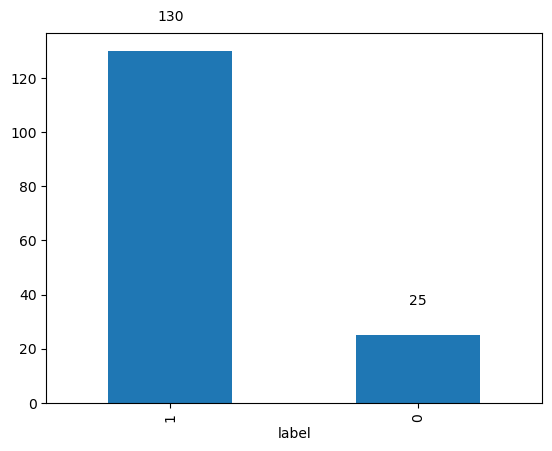

In [34]:
import matplotlib.pyplot as plt

# 레이블 값의 카운트 계산
value_counts = train['label'].value_counts()

# 막대 그래프 그리기
ax = value_counts.plot(kind='bar')

# 막대 위에 숫자 표시하기
for i, v in enumerate(value_counts):
    ax.text(i, v + 10, str(v), ha='center', va='bottom')
plt.show()

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(train['리뷰내용'])
X_train = X_train.toarray()
y_train = train['label']


X_train, X_test, y_train, y_test = train_test_split(
  X_train, y_train, random_state=42, shuffle=True, test_size=0.3
  )

# 시퀀스 길이를 맞추고 데이터를 3차원으로 변환
maxlen = X_train.shape[1]  # 최대 시퀀스 길이
X_train = X_train.reshape(X_train.shape[0], maxlen, 1)
X_test = X_test.reshape(X_test.shape[0], maxlen, 1)


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.regularizers import l2
from tensorflow import keras

# LSTM 모델 정의
model = keras.models.Sequential([
    keras.layers.LSTM(64, dropout=0.5, recurrent_dropout=0.5),
    keras.layers.Dropout(0.5),  # 드롭아웃 추가
    keras.layers.Dense(1, activation='sigmoid')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [26]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 320ms/step - acc: 0.5501 - loss: 0.6908 - val_acc: 0.8182 - val_loss: 0.6829
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - acc: 0.8676 - loss: 0.6792 - val_acc: 0.8182 - val_loss: 0.6695
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - acc: 0.8755 - loss: 0.6605 - val_acc: 0.8182 - val_loss: 0.6490
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step - acc: 0.9184 - loss: 0.6281 - val_acc: 0.8182 - val_loss: 0.6190
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - acc: 0.8598 - loss: 0.5800 - val_acc: 0.8182 - val_loss: 0.5756
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - acc: 0.8911 - loss: 0.4931 - val_acc: 0.8182 - val_loss: 0.4816
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 174ms/step - acc: 0.8755 - loss: 0.4472 - val_acc: 0.8182 - val_loss: 0.5274
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - acc: 0.8715 - loss: 0.4067 - val_acc: 0.8182 - val_loss: 0.6007
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - acc: 0.8989 - loss: 

In [27]:
# 테스트 데이터셋에 대한 예측과 평가
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')
print(f'Test loss: {loss:.4f}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - acc: 0.8023 - loss: 0.6941
Test accuracy: 0.7660
Test loss: 0.8152


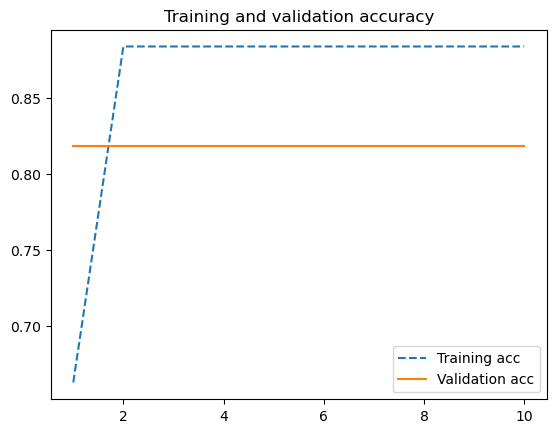

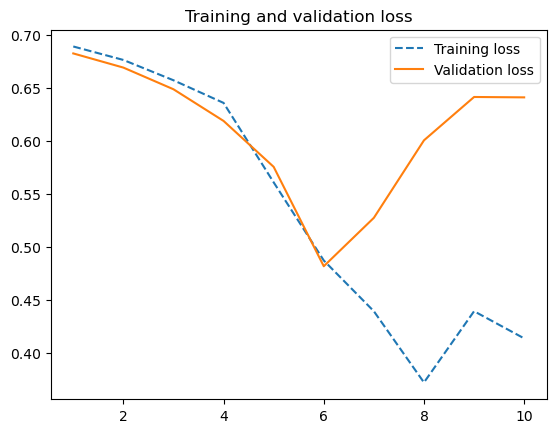

In [28]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '--', label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, '--', label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# T셀파 머신러닝(랜덤포레스트) / 그리드서치

In [21]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, log_loss, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint
from konlpy.tag import Kkma, Hannanum, Komoran, Okt

In [22]:
okt = Okt()
stop_words = [
    '은', '는', '이', '가', '을', '를', '에', '에서', '의', '와', '과', '도', '으로', '로', '한', '하다',
    '어', '그리고', '그래서', '그러나', '하지만', '때문에', '저', '나', '너', '우리', '당신', '아', '어', '예', 
    '아니', '다니', '고', '게', '도', '있', '하', '게', '들', '된', '하다', '더', '게', '것', '들', '등', '합니다', 
    '수', '그리고', '만큼', '좀', '아주', '조금', '합니다', '되', '된', '것', '에', '서', '게', '지만', '했다', '했', 
    '된', '통해', '고', '되었', '는지', '있는', '되면', '번', '갔었', '라는', '지만', '같다', '라고', '너무', '해서', 
    '말', '번', '이후', '것', '좀', '어떻게', '있는', '처럼', '대해', '동안', '위해', '정말', '제일', '아직', '모두'
]

train = pd.read_csv('./tselpa(크롤링).csv', encoding='cp949')
# 'Unnamed: 0' 열 제거
if 'Unnamed: 0' in train.columns:
    train = train.drop(columns=['Unnamed: 0'])

In [23]:
# 결측치 확인 및 처리
train = train.dropna(subset=['리뷰내용', '별점'])
# 별점 기준 라벨링: 4-5점은 긍정(1), 1-3점은 부정(0)
train['label'] = train['별점'].apply(lambda x: 1 if x > 4 else 0)
import re

# 정규표현식을 사용하여 특수 문자 및 공백 제거 함수 정의
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # 특수 문자 제거
    text = re.sub(r'\s+', ' ', text)     # 여러 개의 공백을 하나의 공백으로 변환
    return text.strip()     
# 전처리 및 토큰화 함수 정의
def preprocess(sentence):
    # 특수 문자 및 공백 제거
    sentence = clean_text(sentence)
    # 형태소 분석 및 불용어 처리
    tokenized_sentence = okt.morphs(sentence, stem=True)
    removed_sentence = [word for word in tokenized_sentence if word not in stop_words]
    return ' '.join(removed_sentence)
train['리뷰내용'] = train['리뷰내용'].apply(preprocess)


In [24]:
# 언더 샘플링 수행
Training_data_0 = train[train['label'] == 0]
Training_data_1 = train[train['label'] == 1].sample(50, random_state=41)
Undersample_data = pd.concat([Training_data_0, Training_data_1]).sample(frac=1, random_state=41).reset_index(drop=True)

In [25]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(Undersample_data['리뷰내용'])
y = Undersample_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.3)

In [26]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2071 stored elements and shape (75, 933)>
  Coords	Values
  (0, 70)	0.26240852374797174
  (0, 877)	0.17134170318225594
  (0, 757)	0.2105620480181857
  (0, 473)	0.26240852374797174
  (0, 226)	0.3129926935876743
  (0, 233)	0.24842641756130504
  (0, 164)	0.3046061912560556
  (0, 612)	0.26240852374797174
  (0, 97)	0.22318817891204198
  (0, 235)	0.11727600195790738
  (0, 606)	0.16594876756462806
  (0, 557)	0.2513279351978804
  (0, 626)	0.10378599173432675
  (0, 611)	0.23946609275360023
  (0, 640)	0.18396783407611225
  (0, 598)	0.26240852374797174
  (0, 357)	0.2105620480181857
  (0, 472)	0.20024574791767044
  (0, 285)	0.13808297208736914
  (0, 736)	0.10552714440425272
  (0, 35)	0.16594876756462806
  (1, 235)	0.10432296141745709
  (1, 736)	0.09387175577600766
  (1, 169)	0.4909462021888453
  (1, 629)	0.19853722320641878
  :	:
  (72, 632)	0.254979231132611
  (72, 282)	0.254979231132611
  (72, 463)	0.254979231132611
  (72, 358)	0.2549

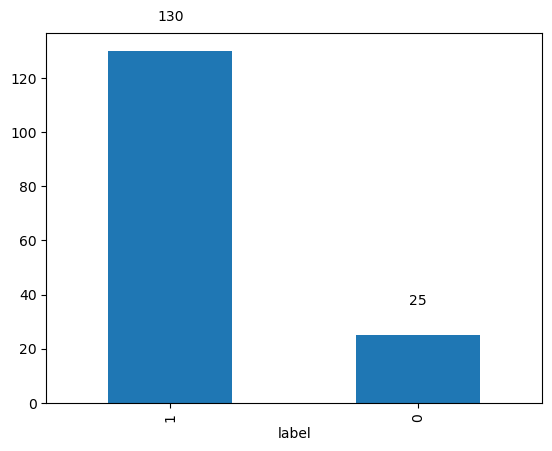

In [27]:
import matplotlib.pyplot as plt

# 레이블 값의 카운트 계산
value_counts = train['label'].value_counts()

# 막대 그래프 그리기
ax = value_counts.plot(kind='bar')

# 막대 위에 숫자 표시하기
for i, v in enumerate(value_counts):
    ax.text(i, v + 10, str(v), ha='center', va='bottom')
plt.show()

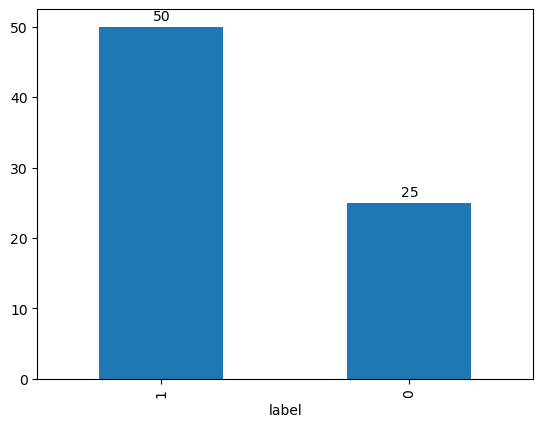

In [28]:
import matplotlib.pyplot as plt

# 레이블 값의 카운트 계산
value_counts = Undersample_data['label'].value_counts()

# 막대 그래프 그리기
ax = value_counts.plot(kind='bar')

# 막대 위에 숫자 표시하기
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom')
plt.show()

In [29]:
# 랜덤 포레스트 모델 정의
rf = RandomForestClassifier(random_state=42)

# 그리드 서치 파라미터 설정
param_grid = {
    'n_estimators': [100, 150, 200],  # 적절한 수의 나무
    'max_depth': [10, 20, 30, 40],    # 최대 깊이 제한
    'min_samples_split': [5, 10, 15], # 분할에 필요한 최소 샘플 수
    'min_samples_leaf': [2, 4, 6],    # 리프 노드에 필요한 최소 샘플 수
    'bootstrap': [True, False]        # 부트스트래핑 여부
}

# 그리드 서치 정의
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

# 그리드 서치 학습
grid_search.fit(X_train, y_train)

# 최적의 파라미터 출력
print(f"Best parameters found: {grid_search.best_params_}")


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters found: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 150}


c:\ProgramData\anaconda3\envs\DL\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Accuracy: 0.782608695652174
Recall: 1.0
Precision: 0.782608695652174
F1 Score: 0.8780487804878049


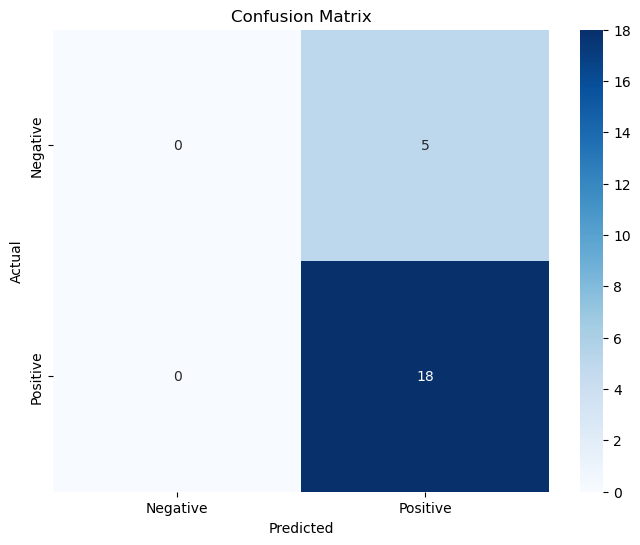

In [30]:
# 최적 모델로 예측
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, log_loss, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import nlpaug.augmenter.word as naw
from scipy.stats import randint
from konlpy.tag import Kkma, Hannanum, Komoran, Okt

c:\ProgramData\anaconda3\envs\DL\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
okt = Okt()
stop_words = [
    '은', '는', '이', '가', '을', '를', '에', '에서', '의', '와', '과', '도', '으로', '로', '한', '하다',
    '어', '그리고', '그래서', '그러나', '하지만', '때문에', '저', '나', '너', '우리', '당신', '아', '어', '예', 
    '아니', '다니', '고', '게', '도', '있', '하', '게', '들', '된', '하다', '더', '게', '것', '들', '등', '합니다', 
    '수', '그리고', '만큼', '좀', '아주', '조금', '합니다', '되', '된', '것', '에', '서', '게', '지만', '했다', '했', 
    '된', '통해', '고', '되었', '는지', '있는', '되면', '번', '갔었', '라는', '지만', '같다', '라고', '너무', '해서', 
    '말', '번', '이후', '것', '좀', '어떻게', '있는', '처럼', '대해', '동안', '위해', '정말', '제일', '아직', '모두'
]

train = pd.read_csv('./tselpa(크롤링).csv', encoding='cp949')
# 'Unnamed: 0' 열 제거
if 'Unnamed: 0' in train.columns:
    train = train.drop(columns=['Unnamed: 0'])

In [3]:
# 결측치 확인 및 처리
train = train.dropna(subset=['리뷰내용', '별점'])
# 별점 기준 라벨링: 4-5점은 긍정(1), 1-3점은 부정(0)
train['label'] = train['별점'].apply(lambda x: 1 if x > 4 else 0)
import re

# 정규표현식을 사용하여 특수 문자 및 공백 제거 함수 정의
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # 특수 문자 제거
    text = re.sub(r'\s+', ' ', text)     # 여러 개의 공백을 하나의 공백으로 변환
    return text.strip()     
# 전처리 및 토큰화 함수 정의
def preprocess(sentence):
    # 특수 문자 및 공백 제거
    sentence = clean_text(sentence)
    # 형태소 분석 및 불용어 처리
    tokenized_sentence = okt.morphs(sentence, stem=True)
    removed_sentence = [word for word in tokenized_sentence if word not in stop_words]
    return ' '.join(removed_sentence)
train['리뷰내용'] = train['리뷰내용'].apply(preprocess)


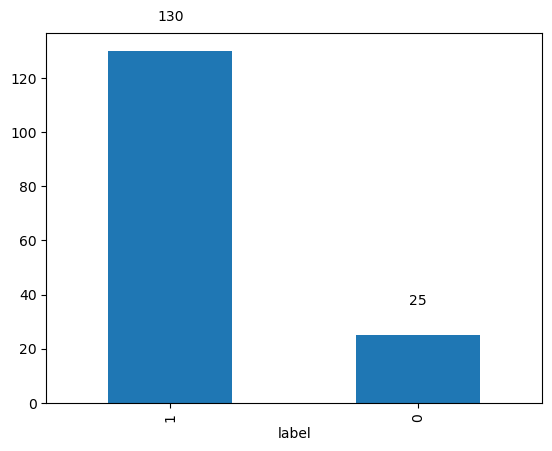

In [4]:
import matplotlib.pyplot as plt

# 레이블 값의 카운트 계산
value_counts = train['label'].value_counts()

# 막대 그래프 그리기
ax = value_counts.plot(kind='bar')

# 막대 위에 숫자 표시하기
for i, v in enumerate(value_counts):
    ax.text(i, v + 10, str(v), ha='center', va='bottom')
plt.show()

In [5]:
# 언더 샘플링 수행
Training_data_0 = train[train['label'] == 0]
Training_data_1 = train[train['label'] == 1].sample(50, random_state=41)
Undersample_data = pd.concat([Training_data_0, Training_data_1]).sample(frac=1, random_state=41).reset_index(drop=True)

In [8]:
# TF-IDF 벡터화
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(Undersample_data['리뷰내용'])
y = Undersample_data['label']

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, test_size=0.2)


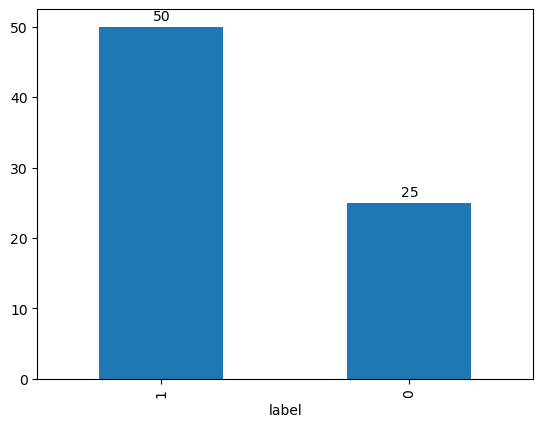

In [9]:
import matplotlib.pyplot as plt

# 레이블 값의 카운트 계산
value_counts = Undersample_data['label'].value_counts()

# 막대 그래프 그리기
ax = value_counts.plot(kind='bar')

# 막대 위에 숫자 표시하기
for i, v in enumerate(value_counts):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom')
plt.show()

In [10]:
from sklearn.model_selection import GridSearchCV

# 랜덤 포레스트 모델 정의
rf = RandomForestClassifier(random_state=42)

# 그리드 서치 파라미터 설정
param_grid = {
    'n_estimators': [100, 150, 200],  # 적절한 수의 나무
    'max_depth': [10, 20, 30, 40],    # 최대 깊이 제한
    'min_samples_split': [5, 10, 15], # 분할에 필요한 최소 샘플 수
    'min_samples_leaf': [2, 4, 6],    # 리프 노드에 필요한 최소 샘플 수
    'bootstrap': [True, False]        # 부트스트래핑 여부
}

# 그리드 서치 정의
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

# 그리드 서치 학습
grid_search.fit(X_train, y_train)

# 최적의 파라미터 출력
print(f"Best parameters found: {grid_search.best_params_}")


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best parameters found: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


c:\ProgramData\anaconda3\envs\DL\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


훈련 세트 정확도: 0.9333
훈련 세트 손실: 0.3942
테스트 세트 정확도: 0.8000
테스트 세트 손실: 0.5100
테스트 세트 정밀도: 0.8000
테스트 세트 재현율: 1.0000
테스트 세트 F1 점수: 0.8889
교차 검증 평균 정확도: 0.6333


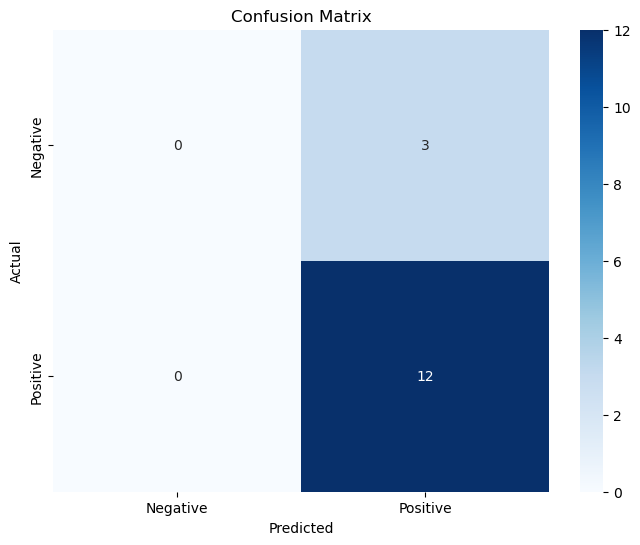

In [11]:
# 최적 모델로 예측
best_rf = grid_search.best_estimator_
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# 평가
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_loss = log_loss(y_train, best_rf.predict_proba(X_train))
test_loss = log_loss(y_test, best_rf.predict_proba(X_test))
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
cv_accuracy = cross_val_score(best_rf, X_train, y_train, cv=5, scoring='accuracy').mean()

# 혼동 행렬
conf_matrix = confusion_matrix(y_test, y_test_pred)

# 평가 결과 출력
print(f"훈련 세트 정확도: {train_accuracy:.4f}")
print(f"훈련 세트 손실: {train_loss:.4f}")
print(f"테스트 세트 정확도: {test_accuracy:.4f}")
print(f"테스트 세트 손실: {test_loss:.4f}")
print(f"테스트 세트 정밀도: {precision:.4f}")
print(f"테스트 세트 재현율: {recall:.4f}")
print(f"테스트 세트 F1 점수: {f1:.4f}")
print(f"교차 검증 평균 정확도: {cv_accuracy:.4f}")

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [19]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import seaborn as sns
import nlpaug

# 패키지 버전 출력
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"NLPaug version: {nlpaug.__version__}")


Pandas version: 2.2.2
Numpy version: 1.26.4
Scikit-learn version: 1.5.1
Matplotlib version: 3.9.1
Seaborn version: 0.13.2
NLPaug version: 1.1.11


C:\Users\user\AppData\Local\Temp\ipykernel_17132\4088969008.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['리뷰내용'] = negative_reviews['리뷰내용'].apply(preprocess)


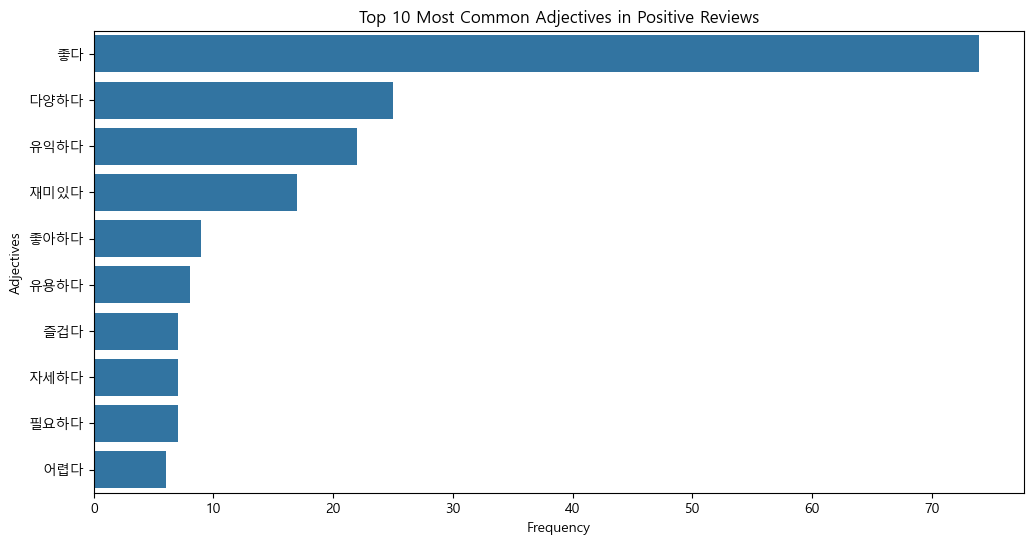

In [104]:
import pandas as pd
from collections import Counter
import re
from konlpy.tag import Okt  # Okt 형태소 분석기 사용
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
train = pd.read_csv('./tselpa(크롤링).csv', encoding='cp949')

# 'Unnamed: 0' 열 제거
if 'Unnamed: 0' in train.columns:
    train = train.drop(columns=['Unnamed: 0'])

# 결측치 확인 및 처리
train = train.dropna(subset=['리뷰내용', '별점'])

# 별점 기준 라벨링: 4-5점은 긍정(1), 1-3점은 부정(0)
train['label'] = train['별점'].apply(lambda x: 1 if x > 4 else 0)

# 정규표현식을 사용하여 특수 문자 및 공백 제거 함수 정의
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # 특수 문자 제거
    text = re.sub(r'\s+', ' ', text)     # 여러 개의 공백을 하나의 공백으로 변환
    return text.strip()

# 전처리 및 토큰화 함수 정의 (형용사만 추출)
okt = Okt()
stop_words = [
    '은', '는', '이', '가', '을', '를', '에', '에서', '의', '와', '과', '도', '으로', '로', '한', '하다',
    '어', '그리고', '그래서', '그러나', '하지만', '때문에', '저', '나', '너', '우리', '당신', '아', '어', '예', 
    '아니', '다니', '고', '게', '도', '있', '하', '게', '들', '된', '하다', '더', '게', '것', '들', '등', '합니다', 
    '수', '그리고', '만큼', '좀', '아주', '조금', '합니다', '되', '된', '것', '에', '서', '게', '지만', '했다', '했', 
    '된', '통해', '고', '되었', '는지', '있는', '되면', '번', '갔었', '라는', '지만', '같다', '라고', '너무', '해서', 
    '말', '번', '이후', '것', '좀', '어떻게', '있는', '처럼', '대해', '동안', '위해', '정말', '제일', '아직', '모두',
    '있다', '이다', '어떻다', '아니다', '없다','많다'
]

def preprocess(sentence):
    # 특수 문자 및 공백 제거
    sentence = clean_text(sentence)
    # 형태소 분석 및 형용사 추출
    tokenized_sentence = okt.pos(sentence, stem=True)
    adj_words = [word for word, pos in tokenized_sentence if pos == 'Adjective' and word not in stop_words]
    return ' '.join(adj_words)

# label이 0인 리뷰 데이터 필터링
negative_reviews = train[train['label'] == 1]

# 전처리된 후기 데이터 생성 (형용사만 추출)
negative_reviews['리뷰내용'] = negative_reviews['리뷰내용'].apply(preprocess)

# 모든 후기의 단어를 합침
all_words = ' '.join(negative_reviews['리뷰내용']).split()

# 단어 빈도수 계산
word_freq = Counter(all_words)

# 빈도수가 높은 상위 10개 단어 추출
common_words = word_freq.most_common(10)
words = [word for word, freq in common_words]
frequencies = [freq for word, freq in common_words]

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=frequencies, y=words)
plt.title('Top 10 Most Common Adjectives in Positive Reviews')
plt.xlabel('Frequency')
plt.ylabel('Adjectives')
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_17132\1422609381.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['리뷰내용'] = negative_reviews['리뷰내용'].apply(preprocess)


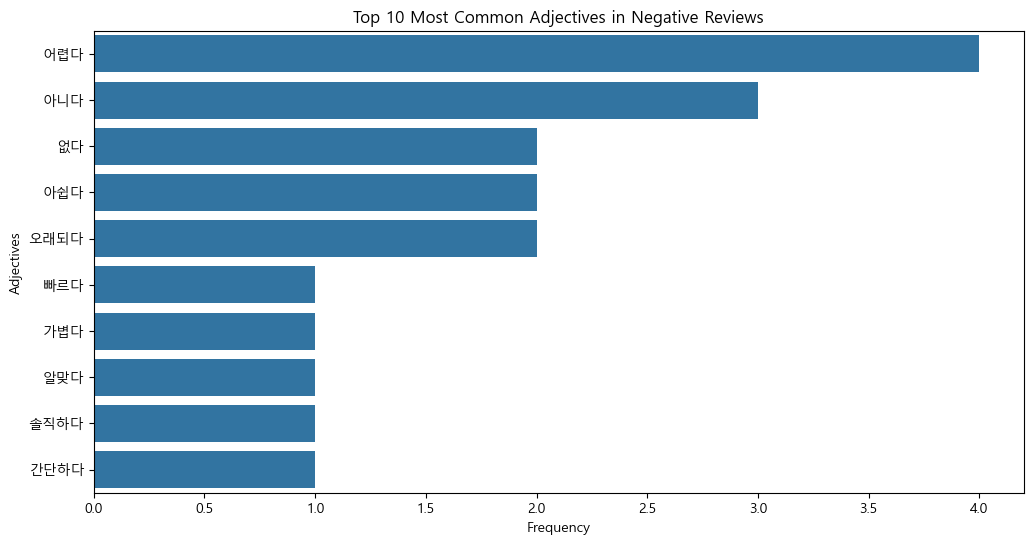

In [92]:
import pandas as pd
from collections import Counter
import re
from konlpy.tag import Okt  # Okt 형태소 분석기 사용
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 불러오기
train = pd.read_csv('./tselpa(크롤링).csv', encoding='cp949')

# 'Unnamed: 0' 열 제거
if 'Unnamed: 0' in train.columns:
    train = train.drop(columns=['Unnamed: 0'])

# 결측치 확인 및 처리
train = train.dropna(subset=['리뷰내용', '별점'])

# 별점 기준 라벨링: 4-5점은 긍정(1), 1-3점은 부정(0)
train['label'] = train['별점'].apply(lambda x: 1 if x >= 4 else 0)

# 정규표현식을 사용하여 특수 문자 및 공백 제거 함수 정의
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # 특수 문자 제거
    text = re.sub(r'\s+', ' ', text)     # 여러 개의 공백을 하나의 공백으로 변환
    return text.strip()

# 전처리 및 토큰화 함수 정의 (형용사만 추출)
okt = Okt()
stop_words = [
    '은', '는', '이', '가', '을', '를', '에', '에서', '의', '와', '과', '도', '으로', '로', '한', '하다',
    '어', '그리고', '그래서', '그러나', '하지만', '때문에', '저', '나', '너', '우리', '당신', '아', '어', '예', 
    '아니', '다니', '고', '게', '도', '있', '하', '게', '들', '된', '하다', '더', '게', '것', '들', '등', '합니다', 
    '수', '그리고', '만큼', '좀', '아주', '조금', '합니다', '되', '된', '것', '에', '서', '게', '지만', '했다', '했', 
    '된', '통해', '고', '되었', '는지', '있는', '되면', '번', '갔었', '라는', '지만', '같다', '라고', '너무', '해서', 
    '말', '번', '이후', '것', '좀', '어떻게', '있는', '처럼', '대해', '동안', '위해', '정말', '제일', '아직', '모두',
    '있다', '좋다','이다', '많다', '다양하다', '적합하다','재미있다'
]

def preprocess(sentence):
    # 특수 문자 및 공백 제거
    sentence = clean_text(sentence)
    # 형태소 분석 및 형용사 추출
    tokenized_sentence = okt.pos(sentence, stem=True)
    adj_words = [word for word, pos in tokenized_sentence if pos == 'Adjective' and word not in stop_words]
    return ' '.join(adj_words)

# label이 0인 리뷰 데이터 필터링
negative_reviews = train[train['label'] == 0]

# 전처리된 후기 데이터 생성 (형용사만 추출)
negative_reviews['리뷰내용'] = negative_reviews['리뷰내용'].apply(preprocess)

# 모든 후기의 단어를 합침
all_words = ' '.join(negative_reviews['리뷰내용']).split()

# 단어 빈도수 계산
word_freq = Counter(all_words)

# 빈도수가 높은 상위 10개 단어 추출
common_words = word_freq.most_common(10)
words = [word for word, freq in common_words]
frequencies = [freq for word, freq in common_words]

# 시각화
plt.figure(figsize=(12, 6))
sns.barplot(x=frequencies, y=words)
plt.title('Top 10 Most Common Adjectives in Negative Reviews')
plt.xlabel('Frequency')
plt.ylabel('Adjectives')
plt.show()
